In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(62.84794978692483, -94.53526615037391),
 (17.109218739283946, -116.05051171802008),
 (8.534065780220047, 88.13464194136577),
 (-13.067773177795118, -122.93679558057289),
 (-24.356117332784294, -48.982251558912395),
 (-1.2619999580862356, -13.897809079816767),
 (-58.46950470871393, 0.5324295788599045),
 (-69.54224761462706, -25.557571634697013),
 (62.23844672111534, 127.69125398648089),
 (-35.553138756003946, 77.44126198542352),
 (42.69085557890267, -31.38968100747212),
 (-13.212797398727858, 87.00230579532547),
 (76.54846813045108, -161.20261544865372),
 (-60.66789501056286, -117.86997927134769),
 (71.83147472017575, 106.60663674882699),
 (-62.68253530545253, -38.25765551738465),
 (69.09343676624289, 37.892449663286015),
 (56.93733265904743, -108.66068408822741),
 (84.52648812897408, -132.2028282275757),
 (25.069585083574566, -162.0811350214224),
 (70.79283198156779, -29.74860914500931),
 (-12.90229641670021, 83.5543612805896),
 (76.14874328179403, 103.38489258383657),
 (43.343556312

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = lat_lngs

In [7]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for value in coordinates:
    city = citipy.nearest_city(value[0],value[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [8]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | apiai
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | berdigestyakh
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | meadow lake
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22

Processing Record 33 of Set 4 | los llanos de aridane
Processing Record 34 of Set 4 | bac lieu
Processing Record 35 of Set 4 | saleaula
City not found. Skipping...
Processing Record 36 of Set 4 | tilichiki
Processing Record 37 of Set 4 | fortuna
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | tsiroanomandidy
Processing Record 41 of Set 4 | russell
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | maracacume
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | ambilobe
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | cervo
Processing Record 50 of Set 4 | stromness
Processing Record 1 of Set 5 | tornio
Processing Record 2 of Set 5 | katangli
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | liver

Processing Record 24 of Set 8 | leningradskiy
Processing Record 25 of Set 8 | krishnarajasagara
Processing Record 26 of Set 8 | laredo
Processing Record 27 of Set 8 | jalu
Processing Record 28 of Set 8 | mount darwin
Processing Record 29 of Set 8 | taburi
City not found. Skipping...
Processing Record 30 of Set 8 | davila
Processing Record 31 of Set 8 | saint-georges
Processing Record 32 of Set 8 | helena
Processing Record 33 of Set 8 | kijang
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | darhan
Processing Record 36 of Set 8 | malwan
City not found. Skipping...
Processing Record 37 of Set 8 | butembo
Processing Record 38 of Set 8 | ahuimanu
Processing Record 39 of Set 8 | ankazoabo
Processing Record 40 of Set 8 | ceres
Processing Record 41 of Set 8 | lamu
Processing Record 42 of Set 8 | vila velha
Processing Record 43 of Set 8 | batemans bay
Processing Record 44 of Set 8 | samana
Processing Record 45 of Set 8 | mabaruma
Processing Record 46 of Set 8 | santo a

City not found. Skipping...
Processing Record 9 of Set 12 | fort nelson
Processing Record 10 of Set 12 | kargasok
Processing Record 11 of Set 12 | dagua
Processing Record 12 of Set 12 | lavumisa
Processing Record 13 of Set 12 | domoni
Processing Record 14 of Set 12 | port antonio
Processing Record 15 of Set 12 | kampot
Processing Record 16 of Set 12 | henties bay
Processing Record 17 of Set 12 | santa fe
Processing Record 18 of Set 12 | salinas
Processing Record 19 of Set 12 | vung tau
Processing Record 20 of Set 12 | skelleftea
Processing Record 21 of Set 12 | sompeta
Processing Record 22 of Set 12 | tancheng
Processing Record 23 of Set 12 | tura
Processing Record 24 of Set 12 | nemuro
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | baruun-urt
Processing Record 27 of Set 12 | evensk
Processing Record 28 of Set 12 | walvis bay
Processing Record 29 of Set 12 | kurilsk
Processing Record 30 of Set 12 | vikindu
Processing Record 31 of Set 12 | el penon
Processing

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,33.96,100,90,6.91,CA,2021-10-15 05:14:47
1,Cabo San Lucas,22.8909,-109.9124,79.52,79,72,8.84,MX,2021-10-15 05:13:53
2,Port Blair,11.6667,92.7500,82.65,80,76,17.63,IN,2021-10-15 05:14:48
3,Rikitea,-23.1203,-134.9692,74.61,73,33,3.53,PF,2021-10-15 05:14:48
4,Apiai,-24.5094,-48.8425,59.63,97,35,3.29,BR,2021-10-15 05:13:17
5,Georgetown,5.4112,100.3354,91.33,62,66,9.22,MY,2021-10-15 05:10:07
6,Cape Town,-33.9258,18.4232,59.11,69,94,7.00,ZA,2021-10-15 05:13:08
7,Mar Del Plata,-38.0023,-57.5575,52.88,36,40,4.00,AR,2021-10-15 05:14:01
8,Berdigestyakh,62.0989,126.6992,22.50,67,100,8.28,RU,2021-10-15 05:14:49
9,Bambous Virieux,-20.3428,57.7575,78.22,69,16,13.89,MU,2021-10-15 05:14:50


In [10]:
column_reorder = ["City","Country","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [11]:
city_data_df = city_data_df[column_reorder]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,55.7435,-97.8558,33.96,100,90,6.91
1,Cabo San Lucas,MX,22.8909,-109.9124,79.52,79,72,8.84
2,Port Blair,IN,11.6667,92.7500,82.65,80,76,17.63
3,Rikitea,PF,-23.1203,-134.9692,74.61,73,33,3.53
4,Apiai,BR,-24.5094,-48.8425,59.63,97,35,3.29
...,...,...,...,...,...,...,...,...
558,Arman,RU,59.7000,150.1667,27.46,54,97,13.40
559,Shakawe,BW,-18.3667,21.8500,68.70,15,0,5.30
560,Kralendijk,BQ,12.1500,-68.2667,82.38,83,40,13.80
561,Nenjiang,CN,49.1833,125.2167,32.54,87,100,7.83


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

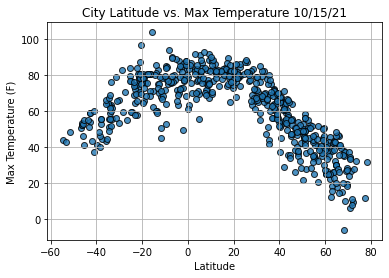

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

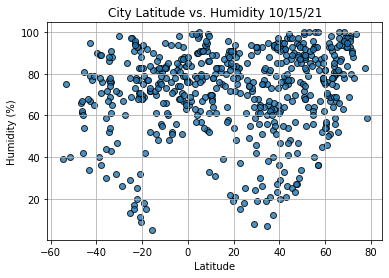

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

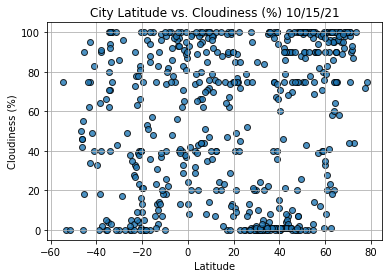

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


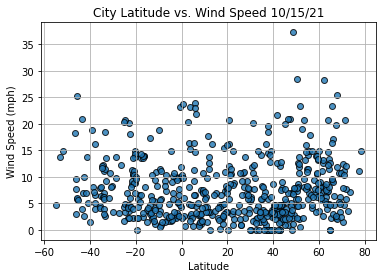

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress
    
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City          Khatanga
Country             RU
Lat            71.9667
Lng              102.5
Max Temp          9.37
Humidity            88
Cloudiness          87
Wind Speed        5.91
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,55.7435,-97.8558,33.96,100,90,6.91
1,Cabo San Lucas,MX,22.8909,-109.9124,79.52,79,72,8.84
2,Port Blair,IN,11.6667,92.7500,82.65,80,76,17.63
5,Georgetown,MY,5.4112,100.3354,91.33,62,66,9.22
8,Berdigestyakh,RU,62.0989,126.6992,22.50,67,100,8.28
...,...,...,...,...,...,...,...,...
557,Bud,US,39.4470,-86.1758,70.41,97,94,3.38
558,Arman,RU,59.7000,150.1667,27.46,54,97,13.40
560,Kralendijk,BQ,12.1500,-68.2667,82.38,83,40,13.80
561,Nenjiang,CN,49.1833,125.2167,32.54,87,100,7.83


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

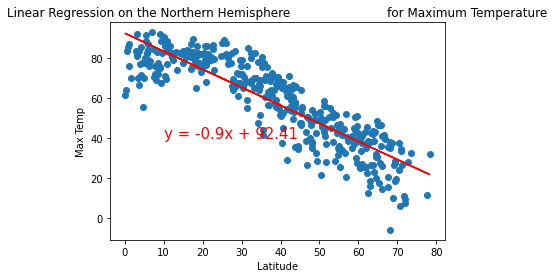

In [22]:
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

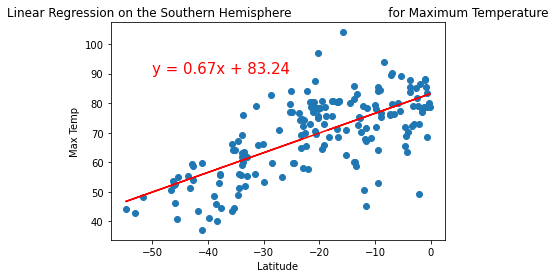

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

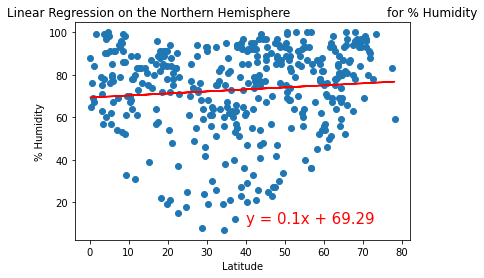

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

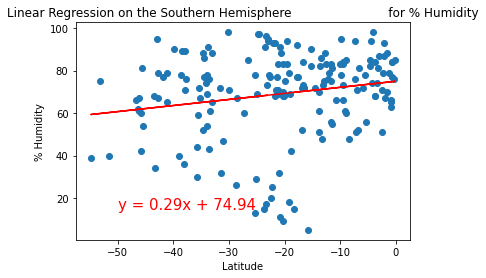

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

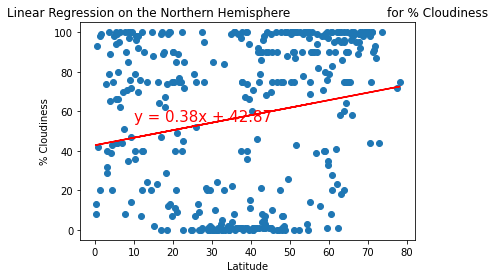

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

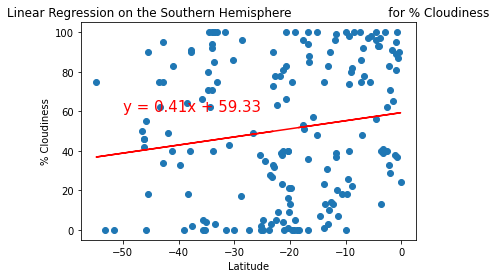

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

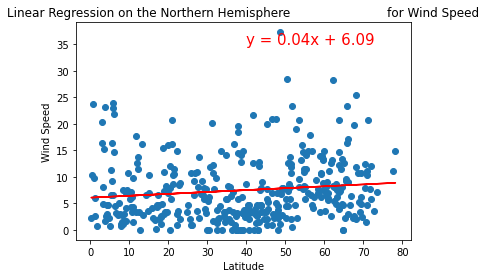

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

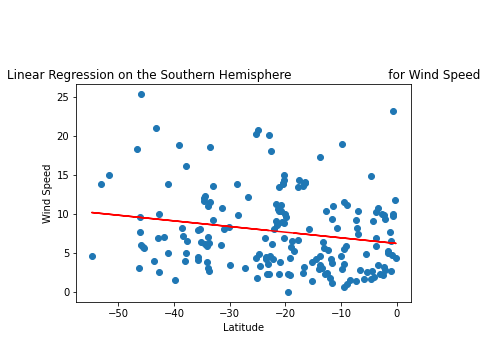

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [30]:
jupyter nbextension enable --py --sys-prefix widgetsnbextension
pip install gmaps
jupyter nbextension enable --py --sys-prefix gmaps
import gmaps

SyntaxError: invalid syntax (<ipython-input-30-01eba017b6c5>, line 1)